In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import BallTree

sns.set_style('darkgrid')        # darkgrid, whitegrid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes


np.set_printoptions(precision=2) 

# set projects files path
path = "/home/brusa/Scratch/NumAn/"

# Final project, Numerical Analysis 2022-2023


## Project description

In this project, we would like to compare the performance of some embarassingly simple algorithms to solve a classification problem based on the MNIST database. 

The abstract aim of the program is to write a function:

```
result = classify(image)
```

that takes as input a small grey scale image of a hand-written digit (from the MNIST database), and returns the digit corresponding to the content of the image.

An example of the images we'll be working on is the following:

![mnist examples](https://m-alcu.github.io/assets/mnist.png)

Some background on the MNIST database (from wikipedia):


## MNIST database

*From Wikipedia, the free encyclopedia*

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

## MNIST sample images.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. There have been a number of scientific papers on attempts to achieve the lowest error rate; one paper, using a hierarchical system of convolutional neural networks, manages to get an error rate on the MNIST database of 0.23%. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support vector machine to get an error rate of 0.8%. An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing images of handwritten digits and characters.

## Algorithm

We start by defining the distance between two images. Ideally, a distance function between two images is zero when the images are the same, and greater than zero when the images are different. 

The bigger the distance, the more different the images should be. Ideally, the distance between an image of the number `9` should be closer to an image of the number `8` than to an image of the number `1` (the digits `9` and `8`, as images, differ by the fact that the first has one closed loop, while the second has two closed loops, while the digit `1` is mostly a straight line). Two different images representing the same number should be even closer (i.e., the distance function should return a "small" number).

Given a distance and a training set of images for which we know everything, the simplest algorithm we can think of to classify an image `z`, is the following: given a set of train images (`x_train`) for which we know the digit they represent (`y_train`), measure the distance between `z` and all images in `x_train`, and classify the image `z` to represent the same digit of the image that is closest to `z` in `x_train`:

Parameters of the algorithm:

- `x_train`
- `y_train`
- a distance function `dist`  

Input of the function

- `z`

Output of the function

- `digit`

where 

```
def classify(z):
    all_distances = array([dist(x, z) for x in x_train])
    digit = y_train[argmin(all_distances)]
    return digit
```

We will experiment with different distances, and we will try to improve the algorithm above in a step by step fashon.

## Data description

Each image in the MNIST dataset represents a hand written digit, in the form of a matrix of `28x28` values between zero and one, representing gray scale values (zero = white, one = black).

We use an array of `60.000x28x28` floating point values to collect all training images, and an array of `60.000` digits containing the (correct) value of the training digits (between 0 and 9 inclusive).

The testing images are instead collected into two arrays of size `10.000x28x28` and `10.0000` respectively.

In [2]:
# load dataset

arc = np.load('{}mnist.npz'.format(path))

x_train = arc['arr_0']
y_train = arc['arr_1']
x_test  = arc['arr_2']
y_test  = arc['arr_3']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Plotting one image

How do we plot the images? `pyplot` contains a command called `imshow`, that can be used to plot images. 

In this case we know it is a greyscale image, with zero representing white and one representing black, so we use a colormap that goes from white to black, i.e., `gray_r` where `_r` stands for reversed. 

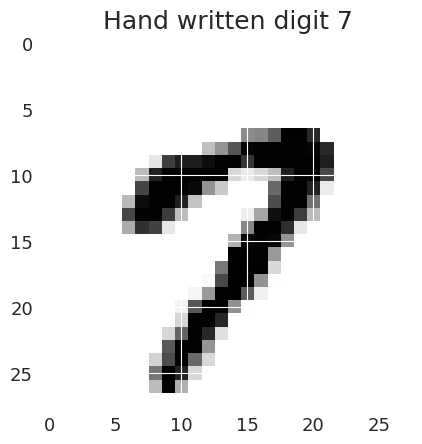

In [3]:
# Show image number 15, and write in the title what digit it should correspond to
N=15
plt.imshow(x_train[N], cmap='gray_r')
_ = plt.title('Hand written digit '+str(y_train[N]))

**IF YOU DON'T HAVE ENOUGH COMPUTATIONAL POWER, RUN THE EXERCISES ONLY UP TO WHAT IS SUSTAINABLE FOR YOUR PC**

General guidelines:

- Time all functions you construct, and try to make them run as fast as possible by precomputing anything that can be precomputed
- Extra points are gained if you reduce the complexity of the given algorithms in any possible way, for example by exploiting linearity, etc.
- If something takes too long to execute, make sure you time it on a smaller set of input data, and give estimates of how long it would take to run the full thing (without actually running it). Plot only the results you manage to run on your PC.

# Assignment 1

Implement the following distance functions

- d_infty $$ d_{\infty}(a,b) := \max_{i,j} |b_{ij}-a_{ij}|$$
- d_one $$ d_1(a,b) := \sum_{i,j} |b_{ij}-a_{ij}|$$
- d_two $$ d_2(a,b) := \sqrt{\sum_{i,j} |b_{ij}-a_{ij}|^2}$$

that take two `(28,28)` images in input, and return a non-negative number.

In [4]:
def d_infty(a,b):
    '''
    computes the Minkowski distance for p = infty
    
    Parameters:
    -----------
    a, b : numpy array of shape (n,n)
    '''
    assert a.shape == b.shape, "arrays must have same shape"
    return np.max(abs(a-b))

def d_one(a,b):
    '''
    computes the Minkowski distance for p = 1
    
    Parameters:
    -----------
    a, b : numpy array of shape (n,n)
    '''
    assert a.shape == b.shape, "arrays must have same shape"
    return np.sum(abs(a-b))

def d_two(a,b):
    '''
    computes the Minkowski distance for p = 2
    
    Note: since x^2 = |x|^2, absolute value is not computed to make the function faster
    
    Parameters:
    -----------
    a, b : numpy array of shape (n,n)
    '''
    assert a.shape == b.shape, "arrays must have same shape"
    return np.sqrt(np.sum((a-b)**2))

In [24]:
### Timings

a = x_train[1]
b = x_train[2]

print("d_infty:")
%timeit d_infty(a,b)
print("d_one:")
%timeit d_one(a,b)
print("d_two:")
%timeit d_two(a,b)

d_infty:
17.6 µs ± 609 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
d_one:
18.2 µs ± 639 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
d_two:
21.3 µs ± 367 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


# Assignment 2

Write a function that, given a number `N`, and a distance function `dist`, computes the distance matrix D of shape `(N,N)` between the first `N` entries of `x_train`:

```
D[i,j] = dist(x_train[i], x_train[j])
```

performing the **minimum** number of operations (i.e., avoid computing a distance if it has already been computed before, i.e., keep in mind that dist(a,b) = dist(b,a)).

In [6]:
def d_matrix(N, dist, dataset=x_train):
    '''
    Computes the distance matrix from the first N entries of a dataset: D(i,j) = ( d(x_i,x_j) )_ij
    
    Parameters:
    --------------
    N : integer
        number of entries of the dataset to consider.
        Note that there is no shuffling, so it will consider the same N entries.
    dist : function
        a distance function compatible with the elements of the dataset.
    dataset : array-like (default: x_train)
        where to take the N examples from.
        
    Returns:
    --------------
    D : array
        matrix of distances (with distande 'dist') of the first N elements of dataset
    '''
    D = np.zeros((N,N))
    for i in range(N):
        for j in range(i+1,N): # diagonal elements are 0
            val = dist(dataset[i], dataset[j])
            D[i,j] = val
            D[j,i] = val # distance is simmetric
    return D

In [7]:
### Timings

print("d_infty:")
%timeit d_matrix(100, d_infty)
print("d_one:")
%timeit d_matrix(100, d_one)
print("d_two:")
%timeit d_matrix(100, d_two)

d_infty:
99 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
d_one:
99.6 ms ± 492 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
d_two:
117 ms ± 384 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Complexity Analysis

Since a distance $d$ is symmetrical the matrix $D$ is symmetric, so there is no need to compute the lower half of the matrix.  
Moreover, $d(x,x) = 0$ so there is no need to compute the diagonal either.  

Given $N$ the size of the matrix we conclude that the complexity of the algorithm is
$$ \frac{N^2}{2} - N = \mathcal{O}(N^2) $$

# Assignment 3

Compute and plot the three distance matrices

- Dinfty
- D1
- D2

for the first 100 images of the training set, using the function `imshow` applied to the three matrices

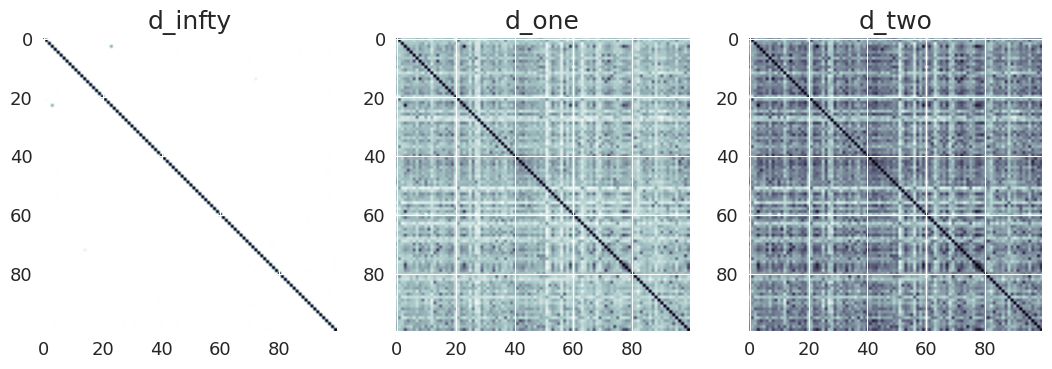

In [8]:
n=100

dinfty_100 = d_matrix(n, d_infty)
done_100 = d_matrix(n, d_two)
dtwo_100 = d_matrix(n, d_one)


def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

fig, axs = plt.subplots(1,3)

axs[0].imshow(dinfty_100, cmap='bone')
axs[0].set_title('d_infty')

axs[1].imshow(done_100, cmap='bone')
axs[1].set_title('d_one')

axs[2].imshow(dtwo_100, cmap='bone')
axs[2].set_title('d_two')

set_size(10,10)

# Assignment 4

Using only a distance matrix, apply the algorithm described above and compute the efficency of the algorithm, i.e., write a function that:

Given a distance matrix with shape `(N,N)`, constructed on the first `N` samples of the `x_train` set, count the number of failures of the **leave one out** strategy, i.e., 

- set `error_counter` to zero

- for every line `i` of the matrix:

    - find the index `j` (different from `i`) for which `D[i,k] >= D[i,j]` for all `k` different from `i` and `j`.

    - if `y_train[j]` is different from `y_train[i]`, increment by one `error_counter`

- return the error: error_counter/N

- apply the function above to the 3 different distance matrices you computed before

In [9]:
def loo(mat, ds_y=y_train):
    '''
    Computes the error of the algorithm based on a distance matrix with a leave one out method.
    
    Parameters:
    --------------
    mat : 2D-array
        matrix used to compute the error.
    ds_y : array-like (default: y_train)
        where to take the correct answers from.
        
    Returns:
    --------------
    error : float
        error obtained    
    '''
    error_counter=0
    matrix = mat.copy()
    
    for i in range(N): # for loop is faster than working with the whole matrix
        matrix[i,i] = np.inf # otherwise it is not the minimum
        j = np.argmin(matrix[i,:])
        
        #error_counter += (ds_y[j] != ds_y[i]) # is slower than the if condition
        if ds_y[j] != ds_y[i]:
            error_counter += 1
            
    return error_counter/N

def loo_scratch(dist, N=100, ds_x=x_train, ds_y=y_train):
    '''
    Computes the error of the algorithm based on a distance matrix with a leave one out method.
    The function computes the distance matrix internally, to pass a precomputed matrix use loo().
    
    Parameters:
    ---------------
    dist : function
        a distance function compatible with the elements of the dataset.
    N : integer
        number of entries of the dataset to consider.
        Note that there is no shuffling, so it will consider always the same N entries.
    ds_x : array-like (default: x_train)
        where to take the N examples from.
    ds_y : array-like (default: y_train)
        where to take the N correct answers from.
        
    Returns:
    ---------------
    error : float
        error obtained    
    '''
    error_counter=0
    matrix = d_matrix(N, dist, dataset=ds_x)
    
    for i in range(N): # for loop is faster than working with the whole matrix
        matrix[i,i] = np.inf # otherwise it is not the minimum
        j = np.argmin(matrix[i,:])
        
        #error_counter += (ds_y[j] != ds_y[i]) # is slower than the if condition
        if ds_y[j] != ds_y[i]:
            error_counter += 1
            
    return error_counter/N

In [10]:
### Timings

print('d_infty, respectively precomputed and from scratch:')
%timeit loo(dinfty_100)
%timeit loo_scratch(d_infty)

print('\nd_one, respectively precomputed and from scratch:')
%timeit loo(done_100)
%timeit loo_scratch(d_one)

print('\nd_two, respectively precomputed and from scratch:')
%timeit loo(dtwo_100)
%timeit loo_scratch(d_two)

d_infty, respectively precomputed and from scratch:
105 µs ± 1.69 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
99.1 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

d_one, respectively precomputed and from scratch:
102 µs ± 1.01 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
103 ms ± 1.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

d_two, respectively precomputed and from scratch:
104 µs ± 747 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
119 ms ± 1.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Complexity Analysis

If the matrix is precomputed we don't have to consider the $\mathcal{O}(N^2)$ cost of computing it.  
We run a `for` loop $n$ times. In this loop we write a value ($c_1$), find the minimum ($\mathcal{O}(N)$), do a comparison ($c_2$) and eventally increment a value ($c_3$), so  

$$
\big( c_1 + \mathcal{O}(N) + c_2 + c_3 \big) \times N = \mathcal{O}(N^2)
$$

# Assignment 5

Run the algorithm implemented above for N=100,200,400,800,1600 on the three different distances, and plot the three error rate as a function of N (i.e., compute the distance matrix, and compute the efficiency associated to the distance matrix).

You should get an error like:
```
[[ 0.58      0.17      0.17    ]
 [ 0.52      0.145     0.135   ]
 [ 0.4425    0.15      0.135   ]
 [ 0.4       0.145     0.12875 ]
 [ 0.369375  0.1025    0.09375 ]]
```
where each column represents a different norm.

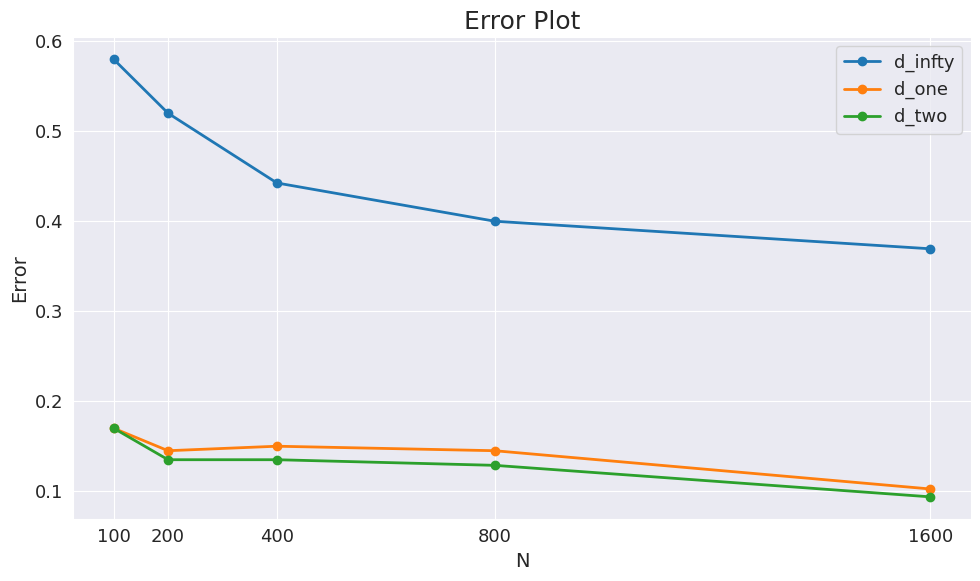

In [11]:
N = 5
xrange = [100 * 2**i for i in range(N)]

dinfty = []
done   = []
dtwo   = []

for N in xrange:
    dinfty.append(loo_scratch(d_infty, N))
    done.append(loo_scratch(d_one, N))
    dtwo.append(loo_scratch(d_two, N))
    
plt.figure(figsize=(10,6), tight_layout=True)
#plotting
plt.plot(xrange, dinfty, 'o-', xrange, done, 'o-', xrange, dtwo, '-o', linewidth=2)
#customization
plt.xticks(xrange)
plt.xlabel('N')
plt.ylabel('Error')
plt.title('Error Plot')
plt.legend(title='', title_fontsize = 13, labels=['d_infty','d_one','d_two'])
plt.show()

In [12]:
# produce image like assignment one
np.stack((dinfty, done, dtwo), axis=1)

array([[0.58, 0.17, 0.17],
       [0.52, 0.14, 0.14],
       [0.44, 0.15, 0.14],
       [0.4 , 0.14, 0.13],
       [0.37, 0.1 , 0.09]])

**In the next assignments, optional points are given if you manage to make the algorithm run faster, by pre-computing everything you can precompute in advance**

# Assignment 6

In principle, it should be possible to decrease the error by using a better norm. From the table above, it is clear that the L2 distance works better than the L1 distance, which works better than the Linfty distance.

However, *none of these distances exploit the fact that the image is a two-dimensional object*, and that there is information also in the **neighboring** information of the pixels. 

One way to exploit this, is to interpret the image as a continuous function with values between zero and one, defined on a square domain `\Omega=[0,27]x[0,27]`.

$$ f: \Omega \to R $$

- Implement a function that computes an approximation of the $H^1$ norm distance on the renormalized images. Given two images $f_1$ and $f_2$
    - Compute $$a = \frac{f_1}{\int_\Omega f_1}$$, $$b=\frac{f_2}{\int_\Omega f_2}$$
    - Define the $H^1$ distance as
    $$
    d_{H^1}(f_1,f_2) := \sqrt{\int_\Omega |\nabla(a-b)|^2+ (a-b)^2}
    $$
    using the algorithm you prefer (or the library you prefer) to compute the gradients and the integrals. Notice that $\nabla f = (\partial f/\partial x, \partial f/\partial y)$ is a vector valued function, and $|\nabla g|^2 := (\partial g/\partial x)^2 + (\partial g/\partial y)^2$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600

In [14]:
def d_H1(f1,f2):
    '''
    Computes the H1 distance of two images, considering them as continuos functions.
    
    Parameters:
    -----------
    f1, f2 : array-like
        Two arrays interpreted as a continuous functions defined in Omega with real values.
        
    Returns:
    --------
    dist : float
        distance between f1 and f2.
    '''
    assert f1.shape == f2.shape # images must be defined on the same set Omega
    
    # normalization, the integral is apporoximated with sum, the trapezoid method could be used but it is slower.
    a = f1 / np.sum(f1) # f1 / \int_\Omega f1
    b = f2 / np.sum(f2) # f2 / \int_\Omega f2
    
    arg = np.square(np.gradient(a-b)) + np.square(a-b)
    return np.sqrt(np.sum(arg)) # \sqrt{ \int_\Omega arg }
    
    
def d_H1_precomp(a,b):
    '''
    Computes the H1 distance of two images, considering them as continuos functions.
    The images must be already normalized.
    
    Parameters:
    -----------
    a, b : array-like
        Two normalized arrays interpreted as a continuous functions defined in Omega with real values.
        
    Returns:
    --------
    dist : float
        distance between f1 and f2
    '''
    assert a.shape == b.shape # images must be defined on the same set Omega
    
    arg = np.square(np.gradient(a-b)) + np.square(a-b)
    return np.sqrt(np.sum(arg)) # \sqrt{ \int_\Omega arg }

In [15]:
print('d_H1 without precomupting:')
%timeit d_H1(x_train[0], x_train[1])

print('d_H1 with precomupting:')
a = x_train[0] / np.sum(x_train[0])
b = x_train[1] / np.sum(x_train[1])
%timeit d_H1_precomp(a,b)

d_H1 without precomupting:
190 µs ± 1.33 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
d_H1 with precomupting:
151 µs ± 354 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [16]:
## precomputing: normalizing images

# compute or load
COMPUTE = False
if COMPUTE:
    size = 1600
    x_train_normalized = np.array([f / np.sum(f) for f in x_train[:size]], copy=True)
    x_test_normalized = np.array([f / np.sum(f) for f in x_test[:size]], copy=True)
else:
    x_train_normalized = np.load("{}x_train_normalized.npy".format(path))
    x_test_normalized = np.load("{}x_test_normalized.npy".format(path))

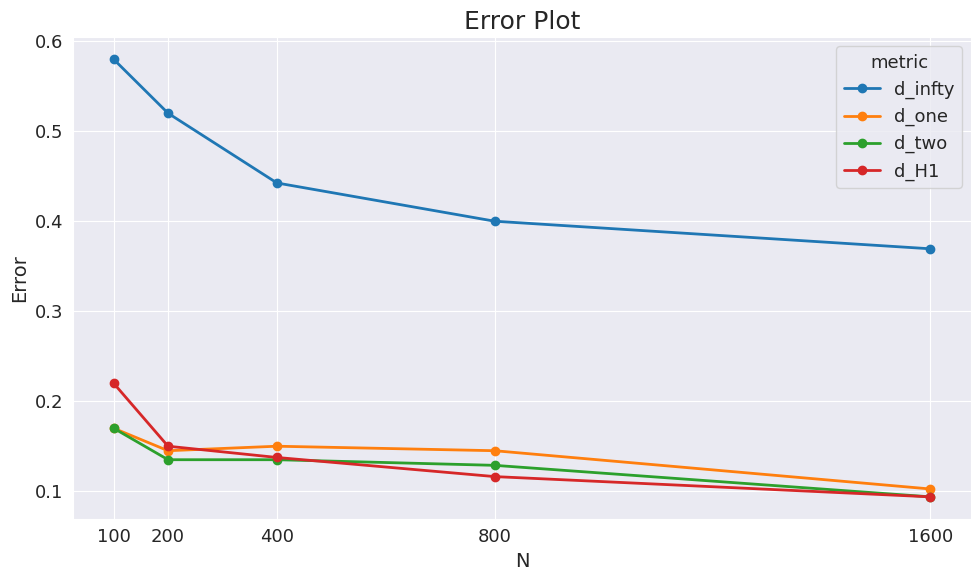

In [17]:
N = 5
xrange = [100 * 2**i for i in range(N)]
dH1    = []

for N in xrange:
    #dinfty.append(loo_scratch(d_infty, N))
    #done.append(loo_scratch(d_one, N))
    #dtwo.append(loo_scratch(d_two, N))
    dH1.append(loo_scratch(d_H1_precomp, N, ds_x=x_train_normalized))
    
plt.figure(figsize=(10,6), tight_layout=True)
#plotting
plt.plot(xrange, dinfty, 'o-', xrange, done, 'o-', xrange, dtwo, '-o', xrange, dH1, 'o-', linewidth=2)
#customization
plt.xticks(xrange)
plt.xlabel('N')
plt.ylabel('Error')
plt.title('Error Plot')
plt.legend(title='metric', title_fontsize = 13, labels=['d_infty','d_one','d_two', 'd_H1'])
plt.show()

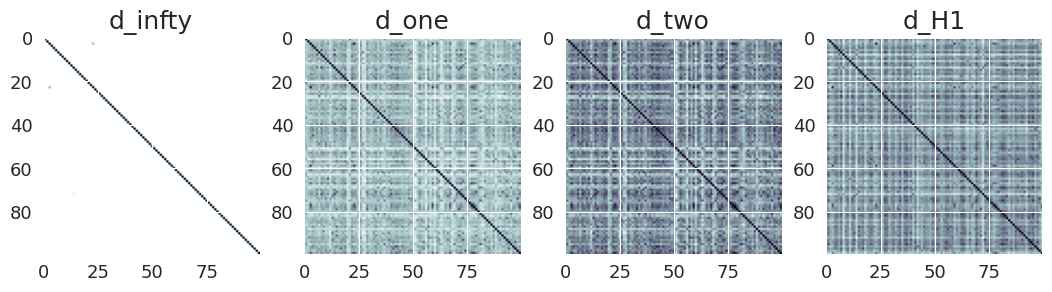

In [18]:
n=100

dinfty_100 = d_matrix(n, d_infty)
done_100 = d_matrix(n, d_two)
dtwo_100 = d_matrix(n, d_one)
dH1_100 = d_matrix(n, d_H1_precomp, dataset=x_train_normalized)


def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

fig, axs = plt.subplots(1,4)

axs[0].imshow(dinfty_100, cmap='bone')
axs[0].set_title('d_infty')

axs[1].imshow(done_100, cmap='bone')
axs[1].set_title('d_one')

axs[2].imshow(dtwo_100, cmap='bone')
axs[2].set_title('d_two')

axs[3].imshow(dH1_100, cmap='bone')
axs[3].set_title('d_H1')

set_size(10,10)

# Assigment 7

Use the `BallTree` algorithm (https://en.wikipedia.org/wiki/Ball_tree), from the `sklearn` package, and construct a tree data structure **that uses a distance from the steps defined above**.

For N in `[3200, 6400]` and for each distance defined above

- Build a tree using the first N entries of the training set `x_train`
- Construct a function that tests the efficiency on all the entries of the test set `x_test`:
    - for any image in `x_test`, call it `x_test[i]`, query the tree for the nearest neighbor (call it `k`), and assign as predicted digit the digit of the `x_train[k]` image, i.e., `y_train[k]`
    - check if `y_train[k]` is equal to the corresponding entry in `y_test[i]`. If not, increment a counter of the error
    - return the efficiency, i.e., `error_counter/len(x_test)`
- Plot, in a single graph, the error of each distance as a function of `N` (including labels, titles, etc.)

- Once you have the tree, experiment with different nearest neighbor algorithms, i.e., instead of taking only one nearest neighbor, take a larger number (a small number of your choice), and instead of returning the single closest digit, return the one with the largest number of occurrences. Plot the same graph you gave before, and see if you gain an improvement. Motivate all choices you have to make to get to the final answer.


**IF YOU DON'T HAVE ENOUGH COMPUTATIONAL POWER, RUN THE EXERCISES ONLY UP TO WHAT IS SUSTAINABLE FOR YOUR PC**

In [19]:
def error(tree, k=1, ytrain=y_train, xtest=x_test, ytest=y_test):
    '''
    Gives the classification error of the tree given examples.
    
    Parameters:
    -----------
    tree : sklearn.BallTree
        Tree used to determine the output.
    k : integer
        number of neighbours to consider.
    ytrain : array-like
        Answers for the dataset used in training.
    xtest : array-like
        Input for the tree.
    ytest : array-like
        Correct output for xtest.
        
    Returns:
    --------
    error : float
        classification error
    
    '''
    error_counter = 0
    size = xtest.shape[0]
    ans = tree.query(xtest.reshape(size, 784), k=k, return_distance=False) # returns k nearest neighbours
    for i in range(size):
        if ytest[i] != np.max(ytrain[ans[i]]): # majority vote 
            error_counter += 1
    return error_counter/size

In [20]:
### Timings

N=100
testN = 100

print("d_infty:\ntraining time for N =", N)
%timeit BallTree(x_train[:N].reshape(N, 784), metric=d_infty)
tree = BallTree(x_train[:N].reshape(N, 784), metric=d_infty)
print("time to calculate error for", testN, "examples:")
%timeit error(tree, xtest=x_test[:testN])

print("\nd_one:\ntraining time for N =", N)
%timeit BallTree(x_train[:N].reshape(N, 784), metric=d_one)
tree = BallTree(x_train[:N].reshape(N, 784), metric=d_one)
print("time to calculate error for", testN, "examples:")
%timeit error(tree, xtest=x_test[:testN])

print("\nd_two:\ntraining time for N =", N)
%timeit BallTree(x_train[:N].reshape(N, 784), metric=d_two)
tree = BallTree(x_train[:N].reshape(N, 784), metric=d_two)
print("time to calculate error for", testN, "examples:")
%timeit error(tree, xtest=x_test[:testN])

print("\nd_H1:\ntraining time for N =", N)
%timeit BallTree(x_train_normalized[:N].reshape(N, 784), metric=d_H1_precomp)
tree = BallTree(x_train_normalized[:N].reshape(N, 784), metric=d_H1_precomp)
print("time to calculate error for", testN, "examples:")
%timeit error(tree, xtest=x_test_normalized[:testN])

d_infty:
training time for N = 100
5.71 ms ± 143 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
time to calculate error for 100 examples:
206 ms ± 5.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

d_one:
training time for N = 100
5.5 ms ± 48.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
time to calculate error for 100 examples:
212 ms ± 6.56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

d_two:
training time for N = 100
6.16 ms ± 71.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
time to calculate error for 100 examples:
245 ms ± 4.73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

d_H1:
training time for N = 100
17 ms ± 276 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
time to calculate error for 100 examples:
797 ms ± 14.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Model Analysis

In this section we will take a look on how the model perform based on the distance chosen and the number of training examples.

**Disclaimer:** My system isn't powerfull enough to run all the simulations effectively, so the test set size is only 100 and we take only 5 smaller training sizes. To obtain more relevant results, I ran the same algorithm on the _orfeo_ cluster with 2000 as test size and 9 different training sizes, saving the results and plotting them here.  
Change the `COMPUTE` variable to `True` to compute, or `False` to load.

In [21]:
def error_matrices(k, arange, testN = 100):
    '''
    Computes the error of the Balltree algorithm implemented with the four distances previously implemented for multiple training test sizes.
    
    Parameters:
    -----------
    k : integer
        Number of neighbours to consider.
    arange : array-like
        Array of integers, used to set the number of training examples to use.
    testN : integer
        Number of test examples to use to compute the error rate.
        
    Returns:
    --------
    errdinf, errd1, errd2, errdH : array-like
        arrays of length `len(arange)` containing the error rates for each training test size. 
    '''
    errdinf = np.array([error(BallTree(x_train[:N].reshape(N, 784), metric=d_infty), k=k, xtest=x_test[:testN]) for N in arange])
    errd1   = np.array([error(BallTree(x_train[:N].reshape(N, 784), metric=d_one), k=k, xtest=x_test[:testN]) for N in arange])
    errd2   = np.array([error(BallTree(x_train[:N].reshape(N, 784), metric=d_two), k=k, xtest=x_test[:testN]) for N in arange])
    errdH   = np.array([error(BallTree(x_train_normalized[:N].reshape(N, 784), metric=d_H1_precomp), k=k, xtest=x_test_normalized[:testN]) for N in arange])
    
    return errdinf, errd1, errd2, errdH

In [22]:
xrange = np.arange(1200,3201, 800)
print("3 trees, 100 test examples")
%timeit error_matrices(1, xrange)

3 trees, 100 test examples
1min 39s ± 1.94 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


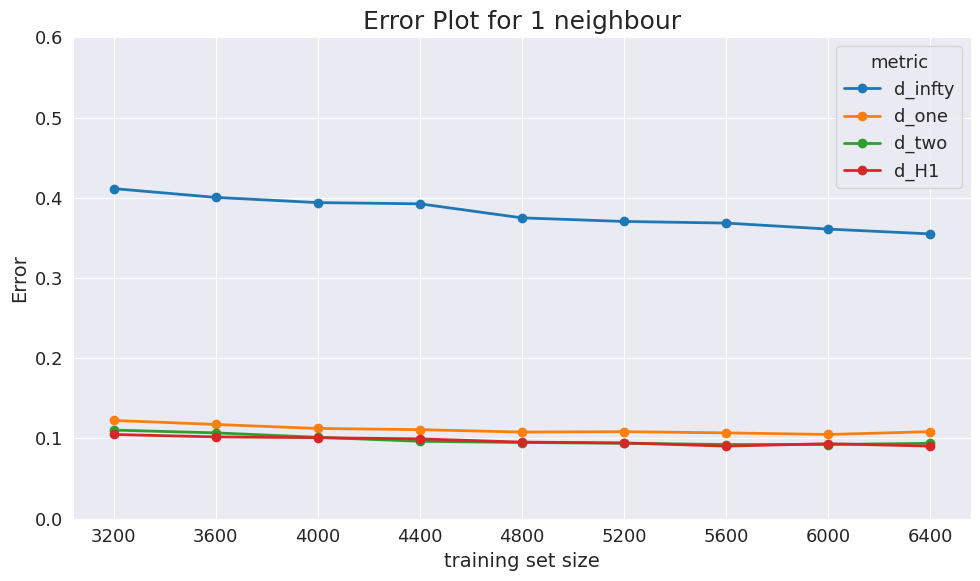

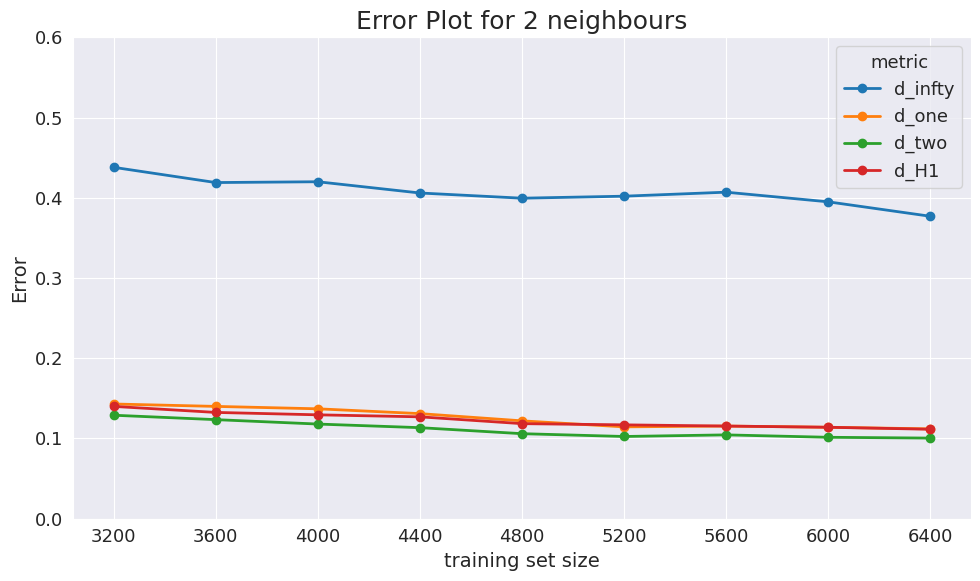

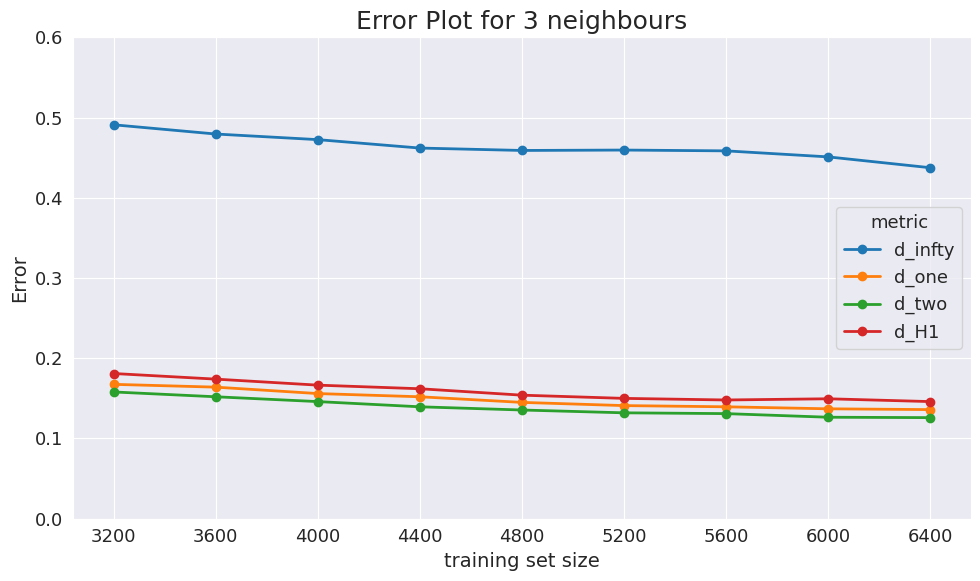

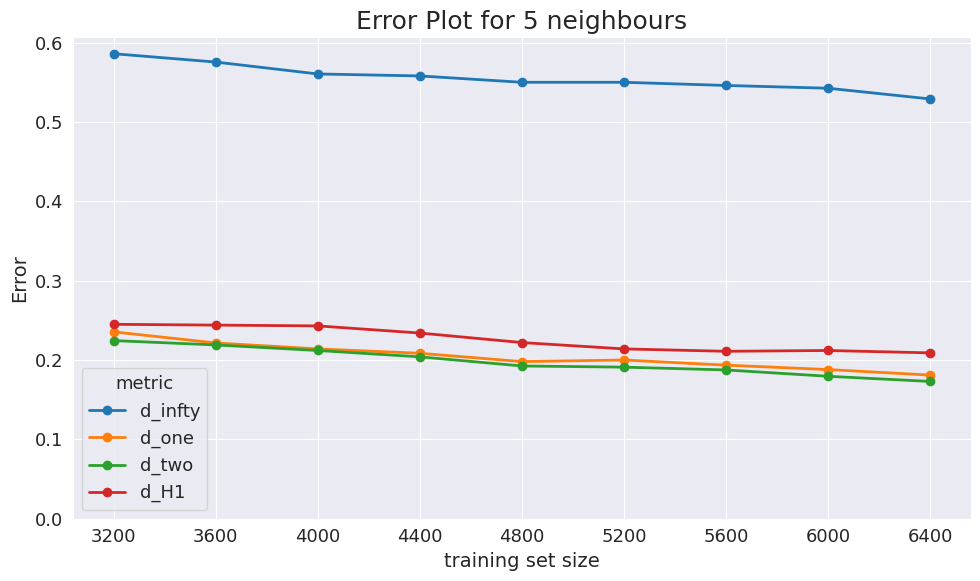

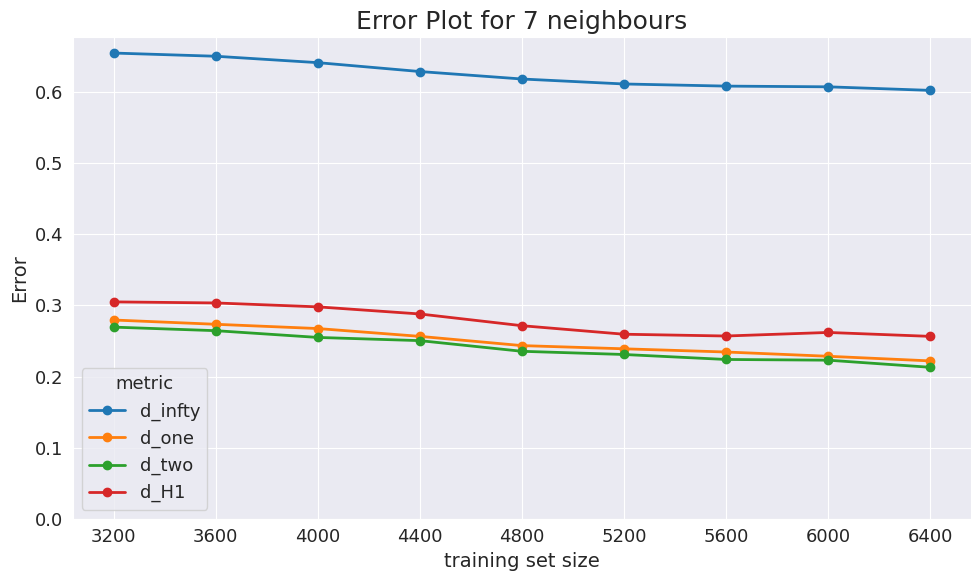

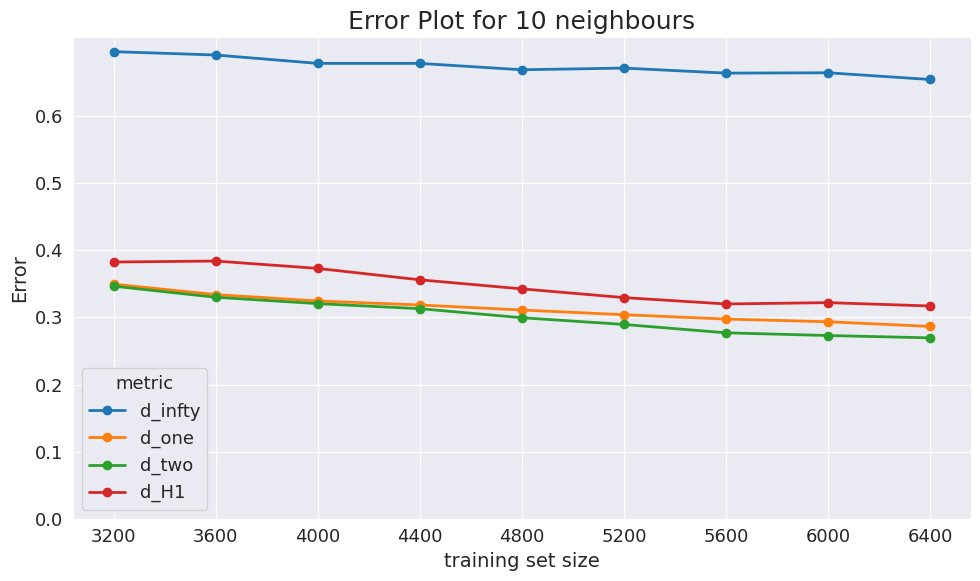

In [23]:
# compute or load
COMPUTE = False

# k = 1 

if COMPUTE:
    xrange = np.arange(1200,3201, 400)
    errdinf, errd1, errd2, errdH = error_matrices(1, xrange)
else:
    xrange = np.arange(3200, 6401, 400)
    errdinf = np.load("{}errdinf_k1.npy".format(path))
    errd1   = np.load("{}errd1_k1.npy".format(path))
    errd2   = np.load("{}errd2_k1.npy".format(path))
    errdH   = np.load("{}errdH_k1.npy".format(path))

plt.figure(figsize=(10,6), tight_layout=True)
#plotting
plt.plot(xrange, errdinf, 'o-', xrange, errd1, 'o-', xrange, errd2, '-o', xrange, errdH, 'o-', linewidth=2)
#customization
plt.xticks(xrange)
plt.xlabel('training set size')
plt.yticks(np.arange(0,0.7,0.1))
plt.ylabel('Error')
plt.title('Error Plot for 1 neighbour')
plt.legend(title='metric', title_fontsize = 13, labels=['d_infty','d_one','d_two', 'd_H1'])
plt.show()


# k = 2

if COMPUTE:
    xrange = np.arange(1200,3201, 400)
    errdinf, errd1, errd2, errdH = error_matrices(2, xrange)
else:
    xrange = np.arange(3200, 6401, 400)
    errdinf = np.load("{}errdinf_k2.npy".format(path))
    errd1   = np.load("{}errd1_k2.npy".format(path))
    errd2   = np.load("{}errd2_k2.npy".format(path))
    errdH   = np.load("{}errdH_k2.npy".format(path))

plt.figure(figsize=(10,6), tight_layout=True)
#plotting
plt.plot(xrange, errdinf, 'o-', xrange, errd1, 'o-', xrange, errd2, '-o', xrange, errdH, 'o-', linewidth=2)
#customization
plt.xticks(xrange)
plt.xlabel('training set size')
plt.ylabel('Error')
plt.yticks(np.arange(0,0.7,0.1))
plt.title('Error Plot for 2 neighbours')
plt.legend(title='metric', title_fontsize = 13, labels=['d_infty','d_one','d_two', 'd_H1'])
plt.show()



# k = 3

if COMPUTE:
    xrange = np.arange(1200,3201, 400)
    errdinf, errd1, errd2, errdH = error_matrices(2, xrange)
else:
    xrange = np.arange(3200, 6401, 400)
    errdinf = np.load("{}errdinf_k3.npy".format(path))
    errd1   = np.load("{}errd1_k3.npy".format(path))
    errd2   = np.load("{}errd2_k3.npy".format(path))
    errdH   = np.load("{}errdH_k3.npy".format(path))

plt.figure(figsize=(10,6), tight_layout=True)
#plotting
plt.plot(xrange, errdinf, 'o-', xrange, errd1, 'o-', xrange, errd2, '-o', xrange, errdH, 'o-', linewidth=2)
#customization
plt.xticks(xrange)
plt.xlabel('training set size')
plt.ylabel('Error')
plt.yticks(np.arange(0,0.7,0.1))
plt.title('Error Plot for 3 neighbours')
plt.legend(title='metric', title_fontsize = 13, labels=['d_infty','d_one','d_two', 'd_H1'])
plt.show()



# k = 5

if COMPUTE:
    xrange = np.arange(1200,3201, 400)
    errdinf, errd1, errd2, errdH = error_matrices(2, xrange)
else:
    xrange = np.arange(3200, 6401, 400)
    errdinf = np.load("{}errdinf_k5.npy".format(path))
    errd1   = np.load("{}errd1_k5.npy".format(path))
    errd2   = np.load("{}errd2_k5.npy".format(path))
    errdH   = np.load("{}errdH_k5.npy".format(path))

plt.figure(figsize=(10,6), tight_layout=True)
#plotting
plt.plot(xrange, errdinf, 'o-', xrange, errd1, 'o-', xrange, errd2, '-o', xrange, errdH, 'o-', linewidth=2)
#customization
plt.xticks(xrange)
plt.xlabel('training set size')
plt.ylabel('Error')
plt.yticks(np.arange(0,0.7,0.1))
plt.title('Error Plot for 5 neighbours')
plt.legend(title='metric', title_fontsize = 13, labels=['d_infty','d_one','d_two', 'd_H1'])
plt.show()



# k = 7

if COMPUTE:
    xrange = np.arange(1200,3201, 400)
    errdinf, errd1, errd2, errdH = error_matrices(2, xrange)
else:
    xrange = np.arange(3200, 6401, 400)
    errdinf = np.load("{}errdinf_k7.npy".format(path))
    errd1   = np.load("{}errd1_k7.npy".format(path))
    errd2   = np.load("{}errd2_k7.npy".format(path))
    errdH   = np.load("{}errdH_k7.npy".format(path))

plt.figure(figsize=(10,6), tight_layout=True)
#plotting
plt.plot(xrange, errdinf, 'o-', xrange, errd1, 'o-', xrange, errd2, '-o', xrange, errdH, 'o-', linewidth=2)
#customization
plt.xticks(xrange)
plt.xlabel('training set size')
plt.ylabel('Error')
plt.yticks(np.arange(0,0.7,0.1))
plt.title('Error Plot for 7 neighbours')
plt.legend(title='metric', title_fontsize = 13, labels=['d_infty','d_one','d_two', 'd_H1'])
plt.show()



# k = 10

if COMPUTE:
    xrange = np.arange(1200,3201, 400)
    errdinf, errd1, errd2, errdH = error_matrices(2, xrange)
else:
    xrange = np.arange(3200, 6401, 400)
    errdinf = np.load("{}errdinf_k10.npy".format(path))
    errd1   = np.load("{}errd1_k10.npy".format(path))
    errd2   = np.load("{}errd2_k10.npy".format(path))
    errdH   = np.load("{}errdH_k10.npy".format(path))

plt.figure(figsize=(10,6), tight_layout=True)
#plotting
plt.plot(xrange, errdinf, 'o-', xrange, errd1, 'o-', xrange, errd2, '-o', xrange, errdH, 'o-', linewidth=2)
#customization
plt.xticks(xrange)
plt.xlabel('training set size')
plt.ylabel('Error')
plt.yticks(np.arange(0,0.7,0.1))
plt.title('Error Plot for 10 neighbours')
plt.legend(title='metric', title_fontsize = 13, labels=['d_infty','d_one','d_two', 'd_H1'])
plt.show()

## Conclusions

The $d_\infty$ distance is the worst across al tested values of $k$ = #neighbours and $N$ = training test size.  
For larger values of $k$ the effectiveness of the model decreases, with $k=1$ being the best choice.  
For $k=1$ the best distance is $d_H$ which performes slightly better than $d_2$, but as $k$ increses, its performance gets worse. It should also be considered that it is the most computationally expensive distance.  
Given the last two observations the best distance, among the 4 considered, is $d_2$.  